In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math
import seaborn as sns

## 1. Preparação dos dados para a análise Antes de iniciar sua análise, é fundamental que você primeiro examine e limpe o conjunto de dados, para tornar o trabalho com ele um processo mais eficiente. Nesta parte, você praticará a correção de tipos de dados, manipulação de valores ausentes e eliminação de colunas e linhas enquanto aprende sobre o conjunto de dados do Stanford Open Policing Project.


(a) Importe o dataset police.csv, e indique quantas variáveis estão disponíveis e quantos
registros policiais estão catalogados;

In [2]:
police_df = pd.read_csv('police.csv', encoding='unicode_escape')
weather_df = pd.read_csv('weather.csv', encoding='unicode_escape')
print("Linhas: ",len(police_df.index))
print("Colunas: ",len(police_df.columns))

Linhas:  91741
Colunas:  15


(b) Conte o número de dados faltosos de cada variável;

In [3]:
print("Valores NaN por coluna:\n")
print(police_df.isna().sum())

Valores NaN por coluna:

state                     0
stop_date                 0
stop_time                 0
county_name           91741
driver_gender          5205
driver_race            5202
violation_raw          5202
violation              5202
search_conducted          0
search_type           88434
stop_outcome           5202
is_arrested            5202
stop_duration          5202
drugs_related_stop        0
district                  0
dtype: int64


(c) Como estamos trabalhando somente com dados de um único estado, não faz sentido
mantermos informações de variáveis como county_name e state. Exclua essas variáveis
do conjunto;


In [4]:
police_df.drop(['county_name','state'], axis=1, inplace=True)

(d) Durante as análises, a coluna driver_gender será crítica para muitas de suas análises.
Como apenas uma pequena fração das linhas está faltando driver_gender, remova
essas linhas do conjunto de dados;


In [5]:
police_df = police_df.dropna(subset=["driver_gender"])

(e) Vá na descrição dos dados e verifique que tipo de variável são search_conducted,
is_arrested e district; depois compare com os tipos de dados que estão armazena-
dos no conjunto de dados. Havendo necessidade, faça a modificação dos tipos de dados
para essas variáveis;

In [6]:
police_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 86536 entries, 0 to 91740
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   stop_date           86536 non-null  object
 1   stop_time           86536 non-null  object
 2   driver_gender       86536 non-null  object
 3   driver_race         86536 non-null  object
 4   violation_raw       86536 non-null  object
 5   violation           86536 non-null  object
 6   search_conducted    86536 non-null  bool  
 7   search_type         3307 non-null   object
 8   stop_outcome        86536 non-null  object
 9   is_arrested         86536 non-null  object
 10  stop_duration       86536 non-null  object
 11  drugs_related_stop  86536 non-null  bool  
 12  district            86536 non-null  object
dtypes: bool(2), object(11)
memory usage: 8.1+ MB


(f) A data e a hora de cada parada de tráfego estão armazenadas em colunas separadas:
stop_date e stop_time. Combine essas duas colunas em uma única coluna, nomeandoa como stop_datetime e converta no formato data e hora (tipo datetime). Isso habilitará atributos baseados em data convenientes que usaremos posteriormente no projeto;

In [7]:
police_df['stop_datetime'] = police_df["stop_date"].astype(str) + " "+ police_df["stop_time"].astype(str)
police_df['stop_datetime'] = police_df['stop_datetime'].astype('datetime64')

(g) Por fim, transforme a coluna stop_datetime no índice do dataframe.

In [8]:
police_df = police_df.set_index('stop_datetime')

##  2. Análise do gênero sobre as infrações O gênero do motorista influencia o comportamento da polícia durante uma parada no trânsito? Nesta parte, você explorará essa questão enquanto pratica filtragem, agrupamento e muito mais!

(a) Antes de comparar as infrações cometidas por cada gênero, você deve examinar as infrações cometidas por todos os motoristas para obter uma compreensão básica dos dados.
Construa uma distribuição de frequências da variável violation e responda: qual a
infração mais comum e a menos notificada?

In [9]:
# Função disponibilizada pelo professor Paulo Ribeiro, com algumas alterações no codigo.
def dist_frequencia_classes(x, nc='auto'):
    #função histogram do numpy para calcular as freq. absolutas e intervalos das classes
    fa,classes= np.histogram(x, bins=nc) 
    fa = fa.astype(int)#pra transformar em int 
    #freq. relativas = freq. absolutas/no. de dados do conjunto x 100 pra forma percentual
    fr = np.around(fa/fa.sum()*100,decimals=2) #duas casas decimais
    #freq. cumulativa usando a função cumsum do numpy
    #frnorm = np.around(fi/(fi.sum() * np.diff(classes)),decimals=2)
    fc = np.cumsum(fa).astype(int) #pra transformar em int 
    # o laço a seguir serve unicamente para escrever os intervalos das classes como strings
    # dentro do vetor 'classe_str'
    classe_str = []
    for i in range(len(classes)):
        if i<=len(classes)-2:
            classe_str.append('{:2.0f} |--  {:2.0f}' .format(classes[i] if i==0 else classes[i]+1,classes[i+1]) )
        else:
            break        
    # a função retorna um dataframe, cujas linhas serão indexadas pelo vetor 'classe_str', e as 
    #colunas terão as frequências absoluta (inteira), relativa (float) e cumulativa (int) calculadas 
    return pd.DataFrame({'Classes':classe_str, 
                         'fi': fa,
                         'fr': fr,
                         #'frnorm':frnorm,
                         'Fc': fc
                        }).set_index('Classes') # transforma a coluna 'Classes' nos indices das linhas 


In [10]:
#Ordenação dos valores do dataframe

data_violation = police_df['violation'].value_counts().sort_values(ascending=True)

In [11]:
at = data_violation.max() - data_violation.min()

In [12]:
k = math.sqrt(len(data_violation))
h = at/k 
h = math.ceil(h)

In [13]:
frequencias = []

# Menor valor da série
menor = round(data_violation.min(),1)

# Menor valor somado a amplitude
menor_amp = round(menor+h,1)

valor = menor
while valor < data_violation.max():
    frequencias.append('{} - {}'.format(round(valor,1),round(valor+h,1)))
    valor += h

In [14]:
freq_abs = pd.qcut(data_violation,len(frequencias),labels=frequencias) 
pd.value_counts(freq_abs)

2856 - 21459     2
21459 - 40062    2
40062 - 58665    2
Name: violation, dtype: int64

In [15]:
data_violation = dist_frequencia_classes(data_violation, nc=2)
data_violation

,fi,fr,Fc
Classes,,,
2856 |-- 25640,5,83.33,5
25640 |-- 48423,1,16.67,6


(b) O interesse agora é responder a seguinte questão: motoristas do sexo masculino e feminino tendem a cometer diferentes tipos de infrações de trânsito? Para isso, crie uma tabela
de contingência para frequência absoluta e outra para frequência relativa, contendo a
distribuição conjunta das variáveis driver_gender e violation.

In [16]:
data_group = police_df.groupby(['driver_gender', 'violation']).size().unstack(1)

In [17]:
data_group.loc['Total',:]= data_group.sum(axis=0)
data_group.loc[:,'Total'] = data_group.sum(axis=1)

In [18]:
data_group

violation,Equipment,Moving violation,Other,Registration/plates,Seat belt,Speeding,Total
driver_gender,,,,,,,
F,2501.0,3286.0,707.0,1056.0,578.0,15646.0,23774.0
M,8420.0,12938.0,3702.0,2647.0,2278.0,32777.0,62762.0
Total,10921.0,16224.0,4409.0,3703.0,2856.0,48423.0,86536.0


(c) Construa um gráfico de barras agrupadas para ilustrar os dados das tabelas de contingência construídas;

<AxesSubplot:xlabel='violation'>

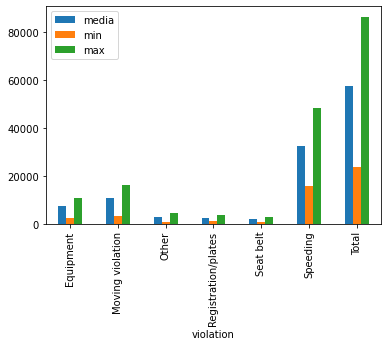

In [19]:
# Plot.
pd.concat(
    [data_group.mean().rename('media'), data_group.min().rename('min'), 
     data_group.max().rename('max')],
    axis=1).plot.bar()

<AxesSubplot:>

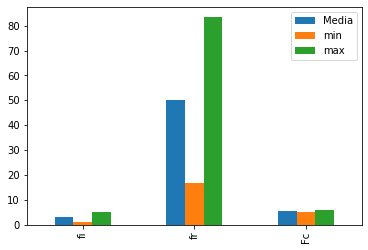

In [20]:

pd.concat(
    [data_violation.mean().rename('Media'), data_violation.min().rename('min'), 
     data_violation.max().rename('max')],
    axis=1).plot.bar()

(d) Quando um motorista é parado por excesso de velocidade, muitas pessoas acreditam que
o gênero influencia se o motorista receberá uma multa ou um aviso. Você pode encontrar
evidências disso no conjunto de dados? Para tentar responder essa pergunta, crie uma
tabela de contingência considerando as variáveis driver_gender e stop_outcome e
então vai comparar a porcentagem de paradas resultados de uma "Citation"versus um
"Warning"(veja o link que descreve as variáveis caso tenha dúvidas de compreensão);


In [21]:
data_group_2 = police_df.groupby(['driver_gender', 'stop_outcome']).size().unstack(1)

In [22]:
data_group_2.loc['Total',:]= data_group_2.sum(axis=0)
data_group_2.loc[:,'Total'] = data_group_2.sum(axis=1)

In [23]:
data_group_2

stop_outcome,Arrest Driver,Arrest Passenger,Citation,N/D,No Action,Warning,Total
driver_gender,,,,,,,
F,556.0,113.0,21251.0,168.0,201.0,1485.0,23774.0
M,2179.0,230.0,55840.0,439.0,423.0,3651.0,62762.0
Total,2735.0,343.0,77091.0,607.0,624.0,5136.0,86536.0


e) O gênero afeta a escolha de veículos a serem revistados? Para responder essa pergunta,
primeiro, calcule a porcentagem de todas as paradas no DataFrame que resultam em
uma revista de veículo;

In [24]:
data_group_3 = police_df.groupby(['driver_gender', 'search_conducted']).size().unstack(1)

In [25]:
data_group_3.loc['Total',:]= data_group_3.sum(axis=0)
data_group_3.loc[:,'Total'] = data_group_3.sum(axis=1)

In [26]:
data_group_3

search_conducted,False,True,Total
driver_gender,,,
F,23318.0,456.0,23774.0
M,59911.0,2851.0,62762.0
Total,83229.0,3307.0,86536.0


(f) Em seguida, filtre o DataFrame por gênero e calcule a taxa de pesquisa para cada grupo
separadamente. Dica: você executará o mesmo cálculo para ambos os gêneros ao mesmo
tempo usando groupby;

In [27]:
data_group_4 = police_df.groupby('driver_gender').size()

In [28]:
data_group_4.loc['Total']= data_group_4.sum(axis=0)

In [29]:
data_group_4

driver_gender
F        23774
M        62762
Total    86536
dtype: int64

(g) Considere agora a hipótese de que a taxa de revista varia de acordo com o tipo de infração, e a diferença na taxa de revista entre homens e mulheres é porque eles tendem a
cometer infrações diferentes. Calcule a taxa de infração para cada combinação de gênero
e infração. Homens e mulheres são revistados com a mesma taxa para cada infração?

In [30]:
data_group_5 = police_df.groupby(['driver_gender','violation']).size().unstack(1)

In [31]:
data_group_5.loc['Total',:]= data_group_5.sum(axis=0)
data_group_5.loc[:,'Total'] = data_group_5.sum(axis=1)

In [32]:
data_group_5

violation,Equipment,Moving violation,Other,Registration/plates,Seat belt,Speeding,Total
driver_gender,,,,,,,
F,2501.0,3286.0,707.0,1056.0,578.0,15646.0,23774.0
M,8420.0,12938.0,3702.0,2647.0,2278.0,32777.0,62762.0
Total,10921.0,16224.0,4409.0,3703.0,2856.0,48423.0,86536.0


## 3. Análise exploratória visual dos dados É mais provável que você seja preso em uma determinada hora do dia? As paradas relacionadas às drogas estão aumentando? Nesta parte, você responderá a essas e outras questões analisando o conjunto de dados visualmente, uma vez que os gráficos podem ajudá-lo a entender as tendências de uma forma que o exame dos dados brutos não pode.


(a) Quando um policial para um motorista, uma pequena porcentagem dessas paradas termina em uma prisão. Isso é conhecido como taxa de prisão. Você descobrirá se a taxa de
prisão varia de acordo com a hora do dia. Primeiro, você calculará a taxa de prisão em
todas as paradas no DataFrame, calculando a média da coluna is_arrested ;

In [33]:
police_df['is_arrested'].mean()

0.0355690117407784

(b) Em seguida, você calculará a taxa de prisão por hora usando o atributo de hora do índice.
A hora varia de 0 a 23, considerando que 0 é meia noite e 12h é meio dia. Para isso,
agrupe (usando groupby) pelo atributo de hora do índice do DataFrame, calculando a
média dos valores agrupados. No final crie uma nova variável hourly_arrest_rate
com os valores encontrados da taxa de prisão por hora;

In [34]:
police_df = police_df.reset_index()

In [35]:
police_df['hourly_arrest_rate'] = police_df.groupby(by=police_df['stop_datetime'].dt.hour, sort=False)['is_arrested'].sum()

In [36]:
df = police_df.dropna(subset=["hourly_arrest_rate"])

(c) Agora crie um gráfico de linha mostrando a variável hourly_arrest_rate, colocando
o rótulo Horas no eixo-x, e Taxa de Prisões, no eixo-y, e o título de Taxa de Prisões por Hora
do Dia;

<AxesSubplot:>

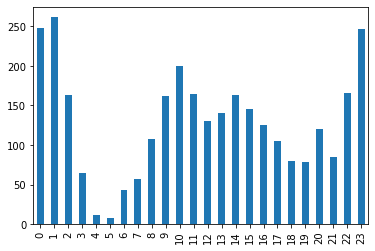

In [37]:
df['hourly_arrest_rate'].plot.bar()

(d) Em uma pequena parte das paradas de trânsito, drogas são encontradas no veículo durante uma busca. Agora, você avaliará se essas interrupções relacionadas à drogas estão
se tornando mais comuns com o tempo. A coluna booleana drug_related_stop indica
se drogas foram encontradas durante uma determinada parada. Você calculará a taxa
anual de drogas reamostrando essa coluna e, em seguida, usará um gráfico de linha para
visualizar como a taxa mudou ao longo do tempo;

In [53]:
police_df['hourly_drug_rate'] = police_df.groupby(by=police_df['stop_datetime'].dt.hour, sort=False)['drugs_related_stop'].sum()

In [54]:
df = police_df.dropna(subset=["hourly_drug_rate"])

<AxesSubplot:>

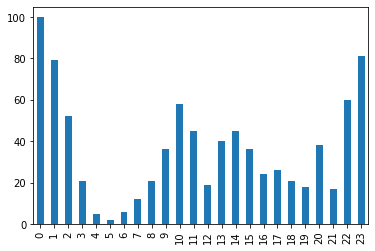

In [55]:
df['hourly_drug_rate'].plot.bar()

(e) Ainda falando sobre drogas, consideremos a hipótese de que, o aumento ou a diminuição das apreensões de drogas estão associadas ao aumento ou diminuição das abordagens políciais, ou seja, mais abordagens, geram mais apreensões e menos abordagens, menos apreensões de drogas. Podemos testar essa hipótese calculando a taxa de
abordagens anual e, em seguida, comparando-a com a taxa anual de medicamentos.
Se a hipótese for verdadeira, você verá que ambas as taxas aumentam com o tempo.
Para isso, calcule a taxa de pesquisa anual reamostrando a coluna search_conducted
e salve o resultado como Annual_search_rate. Concatene Annual_drug_rate e
Annual_search_rate ao longo do eixo das colunas e gere gráficos de linha para os
dados desse resultado da concatenação;

(f) O estado de Rhode Island está dividido em seis distritos policiais, também conhecidos
como zonas. Como as zonas se comparam em termos de quais infrações são detectadas
pela polícia? Para isso, crie uma distribuição conjunta entre as variáveis district e
violation, usando uma tabela de contingência. Depois, selecione as linhas das zonas
’Zona K1’ a ’Zona K3’, gere um gráfico de barras agrupadas que ilustre os resultados
obtido na tabela, e responda a questão colocada.

In [66]:
data_group_5 = police_df.groupby(['district','violation']).size().unstack(1)

In [67]:
data_group_5.loc['Total',:]= data_group_5.sum(axis=0)
data_group_5.loc[:,'Total'] = data_group_5.sum(axis=1)

In [75]:
data_group_5

violation,Equipment,Moving violation,Other,Registration/plates,Seat belt,Speeding,Total
district,,,,,,,
Zone K1,672.0,1254.0,290.0,120.0,NaN,5960.0,8296.0
Zone K2,2061.0,2962.0,942.0,768.0,481.0,10448.0,17662.0
Zone K3,2302.0,2898.0,705.0,695.0,638.0,12322.0,19560.0
Zone X1,296.0,671.0,143.0,38.0,74.0,1119.0,2341.0
Zone X3,2049.0,3086.0,769.0,671.0,820.0,8779.0,16174.0
Zone X4,3541.0,5353.0,1560.0,1411.0,843.0,9795.0,22503.0
Total,10921.0,16224.0,4409.0,3703.0,2856.0,48423.0,86536.0


<AxesSubplot:xlabel='district'>

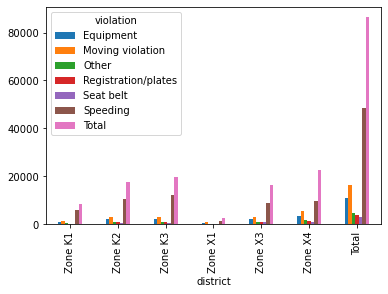

In [74]:
data_group_5.plot.bar()

## 4. Analisando o efeito do clima no policiamento Nesta última parte, você usará um segundo conjunto de dados, weather.csv, para explorar o impacto das condições meteorológicas no comportamento da polícia durante as paradas de trânsito. Você vai praticar mesclar e remodelar conjuntos de dados, avaliando se uma fonte de dados é confiável, trabalhando com dados categóricos e outras habilidades avançadas.

(a) Comece explorando as temperaturas apresentadas no conjunto de dados: carregue o conjunto, selecione as variáveis relativas à temperatura (TMIN, TAVG, TMAX), imprima as
principais medidas resumo usando o comando describe e plote os três boxplots dessas
variáveis em um mesmo gráfico. O que você poderia comentar sobre as temperaturas, com
base nos resultados obtidos? PS.: ao decidir se os valores parecem razoáveis, lembre-se
de que a temperatura é medida em graus Fahrenheit, não Celsius!

In [38]:
df_temp = weather_df[['TMIN','TAVG','TMAX']]

Calculos TMIN 

In [39]:
print("Media:",df_temp['TMIN'].mean())
print("Mediana:",df_temp['TMIN'].median())
print("Moda:",df_temp['TMIN'].mode())

Media: 43.48444112521783
Mediana: 44.0
Moda: 0    63
dtype: int64


Calculos TAVG

In [40]:
print("Media:",df_temp['TAVG'].mean())
print("Mediana:",df_temp['TAVG'].median())
print("Moda:",df_temp['TAVG'].mode())

Media: 52.49301561216105
Mediana: 54.0
Moda: 0    53.0
dtype: float64


Calculos TMAX

In [41]:
print("Media:",df_temp['TMAX'].mean())
print("Mediana:",df_temp['TMAX'].median())
print("Moda:",df_temp['TMAX'].mode())

Media: 61.26860841423948
Mediana: 62.0
Moda: 0    81
dtype: int64


In [49]:
df_temp.describe()

,TMIN,TAVG,TMAX
count,8.000000,8.000000,8.000000
mean,535.188092,192.540466,549.933516
std,1407.084789,414.742743,1401.202040
min,-5.000000,6.000000,15.000000
25%,26.755075,33.707679,39.799879
50%,43.742221,53.246508,61.634304
75%,62.750000,72.500000,83.250000
max,4017.000000,1217.000000,4017.000000


<AxesSubplot:>

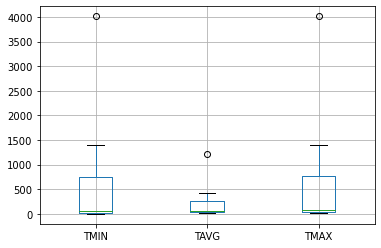

In [50]:
df_temp.describe().boxplot(column=['TMIN', 'TAVG', 'TMAX'])

In [77]:
weather_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4017 entries, 0 to 4016
Data columns (total 27 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   STATION  4017 non-null   object 
 1   DATE     4017 non-null   object 
 2   TAVG     1217 non-null   float64
 3   TMIN     4017 non-null   int64  
 4   TMAX     4017 non-null   int64  
 5   AWND     4017 non-null   float64
 6   WSF2     4017 non-null   float64
 7   WT01     1767 non-null   float64
 8   WT02     221 non-null    float64
 9   WT03     224 non-null    float64
 10  WT04     117 non-null    float64
 11  WT05     360 non-null    float64
 12  WT06     25 non-null     float64
 13  WT07     79 non-null     float64
 14  WT08     404 non-null    float64
 15  WT09     69 non-null     float64
 16  WT10     2 non-null      float64
 17  WT11     1 non-null      float64
 18  WT13     1175 non-null   float64
 19  WT14     575 non-null    float64
 20  WT15     6 non-null      float64
 21  WT16     1326 